In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from eugene import simulate_outbreak_structured

In [236]:
population = int(1e6)
people_per_household = 2.2
n = 5
f_home = 0.0001
R0 = 2
k = 1
days_elapsed_max = 365
max_cases = population
max_community_spread = 10000
D = 7
gamma_shape = 2
max_time = 1000

t, c, times, pop = simulate_outbreak_structured(R0, k, n, D, gamma_shape, max_time, 
                                                  days_elapsed_max, max_cases, f_home, 
                                                  people_per_household, 
                                                  max_community_spread, population)

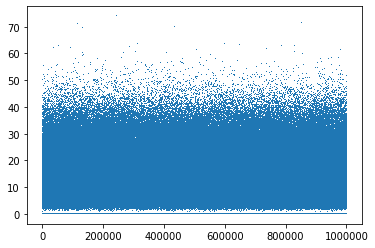

In [237]:
plt.plot(times, ',')
# plt.plot(p * 50)

In [238]:
np.count_nonzero(pop) / len(pop)

0.867163

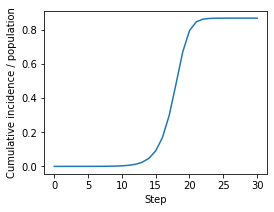

In [239]:
plt.figure(figsize=(4, 3))
plt.plot(t, c / population)
plt.xlabel('Step')
plt.ylabel('Cumulative incidence / population')
plt.savefig('plots/saturation.pdf', bbox_inches='tight')

In [240]:
c[-1]/population

0.867163

R0=2, final size = 0.7966352795481979


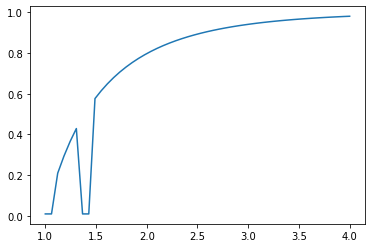

In [213]:
from scipy.optimize import fmin_l_bfgs_b

def f(z, R0, eps): 
    return abs((1 - z) - (1 - eps) * np.exp(-R0 * z))

eps = 0.
R0s = np.linspace(1, 4, 50)

final_size = []
for R0 in R0s:
    final_size.append(fmin_l_bfgs_b(f, [0.7], args=(R0, eps), 
                                    approx_grad=True, 
                                    bounds=[[0.01, 0.99]])[0][0])
    
print(f'R0=2, final size = {np.interp(2, R0s, final_size)}')
    
plt.plot(R0s, final_size)